In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import models

data = np.load("olivetti_faces.npy")

target = np.load("olivetti_faces_target.npy")



Using TensorFlow backend.


In [2]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (300, 4096)
y_train shape:(300,)


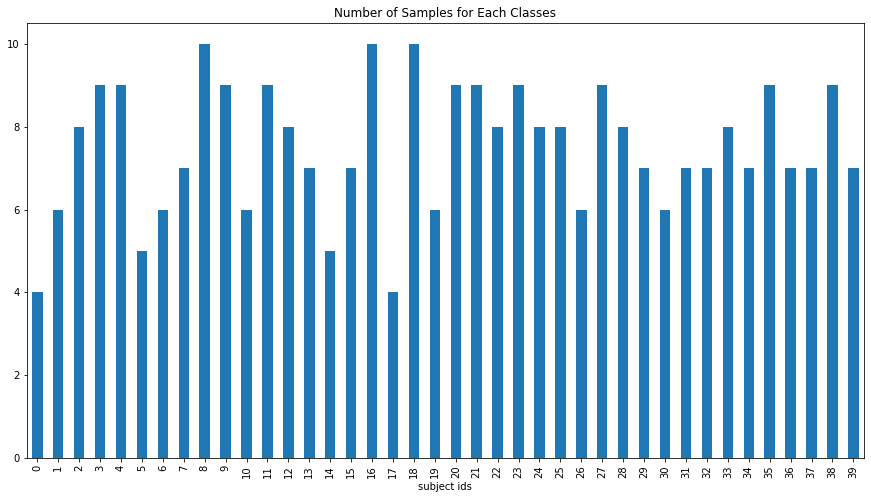

In [4]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)


In [6]:
X_test.shape

(100, 4096)

In [7]:
X_train.shape

(300, 4096)

In [8]:
nb_classes = 40
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [9]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [10]:
model = Sequential()
model.add(Dense(512,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#model.add(Dense(512))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


In [11]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2097664   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 40)                20520     
_________________________________________________________________
activation_2 (Activation)    (None, 40)                0         
Total params: 2,380,840
Trainable params: 2,380,840
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 300 samples, validate on 100 samples
Epoch 1/50
300/300 [==============================] - 2s 7ms/step - loss: 5.9645 - accuracy: 0.0200 - val_loss: 4.5190 - val_accuracy: 0.0200
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 4.2998 - accuracy: 0.0433 - val_loss: 3.8281 - val_accuracy: 0.0400
Epoch 3/50
300/300 [==============================] - 2s 7ms/step - loss: 3.6818 - accuracy: 0.0267 - val_loss: 3.6911 - val_accuracy: 0.0200
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 3.6581 - accuracy: 0.0500 - val_loss: 3.6848 - val_accuracy: 0.0400
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 3.6282 - accuracy: 0.0467 - val_loss: 3.7554 - val_accuracy: 0.0200
Epoch 6/50
300/300 [==============================] - 0s 1ms/step - loss: 3.6075 - accuracy: 0.0433 - val_loss: 3.7108 - val_accuracy: 0.0400
Epoch 7/50
300/300 [==============================] - 0s 1ms/step - loss: 3.5511 - accuracy: 0.0733 - 

In [14]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)


In [15]:
loss

1.4678105449676513

In [16]:
accuracy

0.5899999737739563

In [17]:
predicted_classes = model.predict_classes(X_test)

In [18]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [19]:
correct_classified_indices

array([ 0,  1,  3,  7,  8,  9, 10, 11, 14, 15, 18, 21, 25, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 38, 40, 41, 44, 45, 46, 47, 48, 49, 51, 55,
       56, 57, 58, 59, 60, 61, 65, 69, 71, 72, 74, 77, 79, 80, 81, 83, 84,
       86, 89, 90, 91, 92, 95, 96, 98], dtype=int64)

In [20]:
incorrect_classified_indices

array([ 2,  4,  5,  6, 12, 13, 16, 17, 19, 20, 22, 23, 24, 26, 37, 39, 42,
       43, 50, 52, 53, 54, 62, 63, 64, 66, 67, 68, 70, 73, 75, 76, 78, 82,
       85, 87, 88, 93, 94, 97, 99], dtype=int64)

In [21]:
predicted_classes = model.predict_classes(X_train)

In [22]:
predicted_classes

array([25,  6, 31, 15, 28, 34,  8,  4,  3,  4,  9,  8, 29,  2, 36, 21, 25,
        5, 23, 34,  9, 24, 10, 23, 37, 33,  2, 25, 35, 16, 15, 20,  6, 24,
       21, 10, 31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33,
       22, 38, 11, 21, 13, 27, 12, 19, 29, 38, 13,  3, 37, 25,  3, 23,  9,
        8,  6, 16, 28, 30, 39, 23, 28, 10, 30, 32, 39, 22,  7, 13, 38, 25,
       21,  2, 18, 36, 27, 30, 32, 35,  2,  7, 21, 15, 21, 37, 24, 13, 23,
       21, 27, 27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16,
       38, 38,  8,  4,  1, 28,  7, 24, 39,  7,  1, 36, 21, 38, 38, 22, 16,
       10, 16,  8, 18, 11, 11, 25, 18,  3, 37, 11, 14, 15, 15,  1, 26,  7,
       10, 32, 20, 31, 13, 23, 31, 24, 30,  1, 22, 30, 39, 27,  3,  7, 18,
       30, 37, 34, 18, 35,  8, 25,  1,  4,  8, 26,  3, 38,  5,  4, 27, 30,
       39, 31, 31, 33, 12, 22,  6, 30, 13, 18,  2,  4, 15,  4, 33,  2, 38,
        9, 25,  9, 36,  9, 35, 16,  6, 30,  4, 20, 27, 22, 14, 33, 18, 13,
       35, 39, 26, 32, 20